In [ ]:
# installing required packages
!pip install scikit-optimize
!pip install hyperopt
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.4 requires numpy<

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h1>Section 1: Load Data

In [ ]:
# getting the data ready

csv_path = f"/content/drive/MyDrive/Dissertation/twitter_data_collected_2009_2022.csv"

data= pd.read_csv(csv_path,encoding = 'latin')


In [ ]:
data['Date']

0        2010-01-01 03:52:56
1        2010-01-01 09:09:35
2        2010-01-01 16:03:30
3        2010-01-01 18:33:04
4        2010-01-02 01:51:56
                ...         
50614    2014-09-25 11:18:32
50615    2014-02-09 22:11:25
50616    2014-09-18 18:04:10
50617    2014-05-10 21:51:47
50618    2014-02-28 02:28:40
Name: Date, Length: 50619, dtype: object

In [ ]:
data.tail()

,Sentiment,ID,Date,Query,User,Text,Location,Year,is_cancer_related,is_awareness_related
50614,4,3.157887e+18,2014-09-25 11:18:32,NO_QUERY,dummy_user_318627,A healthy diet and lifestyle can reduce the ri...,Unknown,2014,True,False
50615,0,1.286807e+18,2014-02-09 22:11:25,NO_QUERY,@zombiekilla,Raising awareness for colon cancer this month....,UK,2014,True,False
50616,4,8.212492e+18,2014-09-18 18:04:10,NO_QUERY,dummy_user_416019,Early detection is key. If something feels off...,Unknown,2014,True,True
50617,4,1.286807e+18,2014-05-10 21:51:47,NO_QUERY,kathryn_mcfly,Raising awareness for prostate cancer this mon...,Unknown,2014,True,False
50618,4,1.286807e+18,2014-02-28 02:28:40,NO_QUERY,elsienguyen,Raising awareness for lung cancer this month. ...,UK,2014,True,False


In [ ]:
data.columns

Index(['Sentiment', 'ID', 'Date', 'Query', 'User', 'Text', 'Location', 'Year',
       'is_cancer_related', 'is_awareness_related'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50619 entries, 0 to 50618
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sentiment             50619 non-null  int64  
 1   ID                    50619 non-null  float64
 2   Date                  50619 non-null  object 
 3   Query                 50619 non-null  object 
 4   User                  50617 non-null  object 
 5   Text                  50619 non-null  object 
 6   Location              50619 non-null  object 
 7   Year                  50619 non-null  int64  
 8   is_cancer_related     50619 non-null  bool   
 9   is_awareness_related  50619 non-null  bool   
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [ ]:
shortlisted_cols=data[['Date','Text']]

In [ ]:
shortlisted_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50619 entries, 0 to 50618
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    50619 non-null  object
 1   Text    50619 non-null  object
dtypes: object(2)
memory usage: 791.0+ KB


In [ ]:
shortlisted_cols= shortlisted_cols.dropna().drop_duplicates()

In [ ]:
shortlisted_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37983 entries, 0 to 50617
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    37983 non-null  object
 1   Text    37983 non-null  object
dtypes: object(2)
memory usage: 890.2+ KB


<h1>Section 2: Filter Data Using Keywords

In [ ]:
# Keywords related to depression, anxiety, and aspects of cancer
keywords = [
    # Your initial list
    'depress', 'depression', 'anxiety', 'anxious', 'stress', 'stressed', 'panic', 'hopeless', 'mood', 'mental',
    'sad', 'cancer', 'tumor', 'carcinoma', 'malignant', 'benign', 'chemotherapy', 'radiation', 'oncology',
    'smoke', 'smoking', 'alcohol', 'asbestos', 'pollution', 'processed meat', 'obesity', 'sedentary',
    'precaution', 'suffering', 'medical help', 'hospital', 'clinic', 'treatment',
    # Expanded list
    'mammogram', 'biopsy', 'metastasis', 'genetic', 'BRCA', 'screening', 'prevention', 'survivor', 'support',
    'counseling', 'therapy', 'diagnosis', 'medication', 'surgery', 'risk', 'family history', 'recovery',
    'remission', 'early detection', 'genetic testing', 'self-exam', 'health', 'wellness', 'aid', 'care',
    'advice', 'guidance'
]

# Filter tweets related to the keywords
relevant_tweets = shortlisted_cols[shortlisted_cols['Text'].str.lower().str.contains('|'.join(keywords))]

In [ ]:
relevant_tweets.head()

,Date,Text
22909,2010-04-12 19:18:11,Just read an article about amazing breakthroug...
22910,2010-11-29 14:23:33,Regular check-ups can make all the difference....
22911,2010-10-17 22:10:32,Just read an article about shocking breakthrou...
22912,2010-11-09 11:04:44,Attending a seminar on colon cancer. So much t...
22913,2010-12-20 09:40:43,Incredible progress in the fight against prost...


<h1>Section 3: Preprocessing Data

In [ ]:
lemmatizer = WordNetLemmatizer()
manual_stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]




def preprocess(textdata):
    processedText = np.empty(len(textdata), dtype=object)
    for i, tweet in enumerate(textdata):
        tweet = tweet.lower()
        words = word_tokenize(tweet)
        # Lemmatization and removing stopwords
        filteredWords = [lemmatizer.lemmatize(word) for word in words if word not in manual_stopwords and len(word) > 2]
        # Join words to form the tweet
        cleanTweet = " ".join(filteredWords)
        processedText[i] = cleanTweet
    return processedText

relevant_tweets['ProcessedText'] = preprocess(relevant_tweets['Text'].values)


<h1>Section 4: Create Bigrams and Trigrams

In [ ]:
tokenized_text = [tweet.split() for tweet in relevant_tweets['ProcessedText']]
bigram = Phrases(tokenized_text, min_count=5, threshold=100)
trigram = Phrases(bigram[tokenized_text], threshold=100)
bigram_mod = bigram.freeze()
trigram_mod = trigram.freeze()

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_with_bigrams = make_bigrams(tokenized_text)
data_with_trigrams = make_trigrams(data_with_bigrams)

<h1>Section 5: Create Dictionary and Corpus for LDA

In [ ]:
id2word = Dictionary(data_with_trigrams)
corpus = [id2word.doc2bow(text) for text in data_with_trigrams]

Hyperparameter Tuning

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def objective(params):
    """
    Objective function for LDA hyperparameter optimization.

    Parameters:
    - params: Hyperparameters to be optimized.

    Returns:
    - loss: Negative coherence score (since we want to maximize coherence).
    """
    # Train LDA model
    model = LdaModel(corpus=corpus, id2word=id2word, **params,random_state=21)

    # Compute coherence
    coherence_model = CoherenceModel(model=model, texts=data_with_trigrams, dictionary=id2word, coherence='c_v')
    coherence = coherence_model.get_coherence()

    return {'loss': -coherence, 'status': STATUS_OK}

# Hyperparameter space
space = {
    'num_topics': hp.choice('num_topics', list(range(2, 21, 2))),
    'alpha': hp.choice('alpha', [0.01, 0.1, 0.5, 'symmetric', 'asymmetric', 'auto']),
    'eta': hp.choice('eta', [0.01, 0.1, 0.5, 'symmetric', 'auto']),
    'passes': hp.choice('passes', [1, 5, 10, 15, 20])
}

# Run the optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

# Convert index values back to actual values
best_params = {
    'num_topics': list(range(2, 41, 2))[best['num_topics']],
    'alpha': [0.01, 0.1, 0.5, 'symmetric', 'asymmetric', 'auto'][best['alpha']],
    'eta': [0.01, 0.1, 0.5, 'symmetric', 'auto'][best['eta']],
    'passes': [1, 5, 10, 15, 20][best['passes']]
}

print(best_params)


  5%|▌         | 5/100 [01:54<38:08, 24.09s/trial, best loss: -0.41639242283301636]

  6%|▌         | 6/100 [01:57<26:30, 16.92s/trial, best loss: -0.41639242283301636]

  7%|▋         | 7/100 [02:06<22:28, 14.50s/trial, best loss: -0.41639242283301636]

  9%|▉         | 9/100 [02:44<27:16, 17.98s/trial, best loss: -0.41639242283301636]

 13%|█▎        | 13/100 [04:19<30:03, 20.73s/trial, best loss: -0.42456506943497957]

 18%|█▊        | 18/100 [05:36<22:42, 16.61s/trial, best loss: -0.42456506943497957]

 19%|█▉        | 19/100 [05:38<16:36, 12.30s/trial, best loss: -0.42456506943497957]

 46%|████▌     | 46/100 [17:29<22:46, 25.30s/trial, best loss: -0.45025321462047224]

 50%|█████     | 50/100 [18:36<18:29, 22.19s/trial, best loss: -0.45025321462047224]

 55%|█████▌    | 55/100 [20:12<16:29, 22.00s/trial, best loss: -0.45025321462047224]

 60%|██████    | 60/100 [21:56<14:30, 21.77s/trial, best loss: -0.45025321462047224]

 75%|███████▌  | 75/100 [27:11<09:50, 23.62s/trial, best loss: -0.45025321462047224]

 84%|████████▍ | 84/100 [30:25<06:02, 22.65s/trial, best loss: -0.45025321462047224]

 91%|█████████ | 91/100 [32:52<03:31, 23.54s/trial, best loss: -0.45025321462047224]

 98%|█████████▊| 98/100 [35:22<00:44, 22.47s/trial, best loss: -0.45025321462047224]

 99%|█████████▉| 99/100 [35:25<00:16, 16.58s/trial, best loss: -0.45025321462047224]

100%|██████████| 100/100 [35:58<00:00, 21.59s/trial, best loss: -0.45025321462047224]
{'num_topics': 6, 'alpha': 'asymmetric', 'eta': 0.1, 'passes': 20}


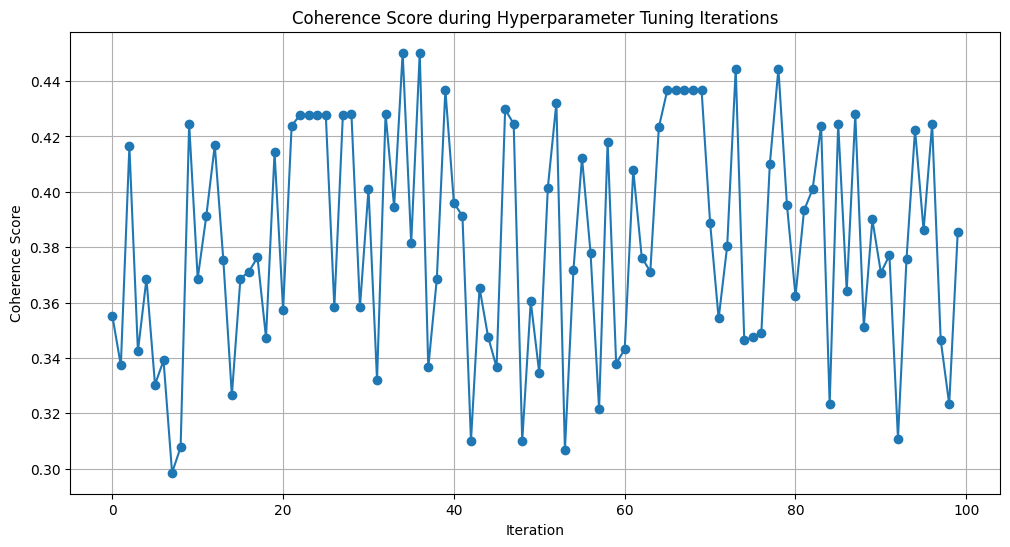

In [ ]:
import matplotlib.pyplot as plt

# Extract coherence scores from the trials object
coherence_scores = [-trial['result']['loss'] for trial in trials.trials]

# Plot the coherence scores
plt.figure(figsize=(12, 6))
plt.plot(coherence_scores, '-o')
plt.xlabel('Iteration')
plt.ylabel('Coherence Score')
plt.title('Coherence Score during Hyperparameter Tuning Iterations')
plt.grid(True)
plt.show()


<h1> Training LDA model

In [ ]:
# --------------------------------- Section 6: Train the LDA Model --------------------------------- #

# Set training parameters as provided
num_topics = 14
chunksize = 1000
passes = 5
iterations = 2000
eval_every = 1
alpha = 0.5
eta = 'symmetric'

# Train the LDA model with the updated parameters
model = LdaModel(
    random_state=21,
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=alpha,
    eta=eta,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

# --------------------------------- Section 8: Visualize Topics --------------------------------- #

from gensim.corpora import Dictionary

# Create a new dictionary object with the token2id attribute
new_dictionary = Dictionary()
new_dictionary.merge_with(id2word)

# Visualize the topics
vis_data = gensimvis.prepare(model, corpus, new_dictionary)
pyLDAvis.display(vis_data)


In [ ]:
# --------------------------------- Section 7: Display Topics --------------------------------- #

topics = model.print_topics(num_words=100)
for topic in topics:
    print(topic)


(0, '0.228*"attending" + 0.225*"much" + 0.225*"seminar" + 0.223*"learn" + 0.046*"cancer" + 0.005*"skin" + 0.000*"colon" + 0.000*"treatment" + 0.000*"hope" + 0.000*"watched" + 0.000*"prostate" + 0.000*"said" + 0.000*"horizon" + 0.000*"new" + 0.000*"handmaid_tale" + 0.000*"webinar" + 0.000*"method" + 0.000*"work" + 0.000*"amp" + 0.000*"care" + 0.000*"..." + 0.000*"oral" + 0.000*"show" + 0.000*"boring" + 0.000*"need" + 0.000*"great" + 0.000*"bridesmaid" + 0.000*"taking" + 0.000*"bladder" + 0.000*"cervical" + 0.000*"pancreatic" + 0.000*"nutrition_play_role" + 0.000*"prevention" + 0.000*"fever" + 0.000*"paid" + 0.000*"mean" + 0.000*"yeah" + 0.000*"harder" + 0.000*"elivier" + 0.000*"sickness" + 0.000*"testicular" + 0.000*"going" + 0.000*"truly_inspiring" + 0.000*"journey" + 0.000*"reading_survivor" + 0.000*"blog_post" + 0.000*"thing_know" + 0.000*"advice" + 0.000*"like" + 0.000*"least" + 0.000*"got_result_back_positive" + 0.000*"way" + 0.000*"advancement" + 0.000*"patient" + 0.000*"one" + 0.

In [ ]:
# Calculate perplexity
perplexity = model.log_perplexity(corpus)

In [ ]:
perplexity

-4.4595566244883145

In [ ]:
import gensim
from gensim import corpora
from sklearn.metrics import jaccard_score
import numpy as np

import random

# Shuffle the corpus
random.shuffle(corpus)

# Split the shuffled corpus into two halves
half_size = len(corpus) // 2
corpus_1 = corpus[:half_size]
corpus_2 = corpus[half_size:]

# Train LDA models on each half
lda_1 = gensim.models.LdaModelmodel = LdaModel(
    random_state=21,
    corpus=corpus_1,
    id2word=id2word,
    chunksize=chunksize,
    alpha=alpha,
    eta=eta,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)
lda_2 = gensim.models.LdaModelmodel = LdaModel(
    random_state=12,
    corpus=corpus_2,
    id2word=id2word,
    chunksize=chunksize,
    alpha=alpha,
    eta=eta,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

# Calculate Jaccard similarity for the top-N words of each topic
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

N = 10  # for top-N words
similarities = []

for t1 in range(6):  # assuming 10 topics
    for t2 in range(6):
        top_words_1 = [word[0] for word in lda_1.show_topic(t1, topn=N)]
        top_words_2 = [word[0] for word in lda_2.show_topic(t2, topn=N)]
        sim = jaccard_similarity(top_words_1, top_words_2)
        similarities.append(sim)

average_similarity = np.mean(similarities)
print("Average Jaccard Similarity:", average_similarity)


Average Jaccard Similarity: 0.07116681955433245


<h1>Section 9: Classifying Tweets Based on LDA Topics

In [ ]:
from gensim.corpora import Dictionary

# Recreate the Gensim dictionary object
id2word_gensim = Dictionary.from_corpus(corpus, id2word)

def classify_tweet_based_on_lda(tweet):
    """Classify a tweet into one of the topics based on the LDA model's output."""
    # Get topic distribution for the tweet using the id2word_gensim object
    tweet_bow = id2word_gensim.doc2bow(tweet.split())
    topic_distribution = model[tweet_bow]

    # Find the topic with the highest probability
    main_topic = max(topic_distribution, key=lambda x: x[1])[0]

    return main_topic

# Apply the function to the 'ProcessedText' column to classify all tweets
relevant_tweets['Topic'] = relevant_tweets['ProcessedText'].apply(classify_tweet_based_on_lda)

# Convert numerical topics to interpretative labels
topic_labels = {
    0: "Learning and Seminars",
    1: "Emotions & Events",
    2: "Research & Articles",
    3: "Prostate & Colon Cancer",
    4: "Ovarian Cancer Awareness",
    5: "Medical Check-ups & Awareness",
    6: "Grieving & Health Importance",
    7: "Lung Cancer Focus",
    8: "Family Health Concerns",
    9: "Emotions & Medical Outcomes",
    10: "Healthy Habits",
    11: "Breast Cancer Awareness",
    12: "Social Support & Health",
    13: "Healthcare Consultation"
}

relevant_tweets['Topic_Label'] = relevant_tweets['Topic'].map(topic_labels)

relevant_tweets.head()

,Date,Text,ProcessedText,Topic,Topic_Label
22909,2010-04-12 19:18:11,Just read an article about amazing breakthroug...,read article amazing breakthrough cancer ovari...,2,Research & Articles
22910,2010-11-29 14:23:33,Regular check-ups can make all the difference....,regular check-ups make difference stay safe ge...,12,Social Support & Health
22911,2010-10-17 22:10:32,Just read an article about shocking breakthrou...,read article shocking breakthrough cancer skin...,2,Research & Articles
22912,2010-11-09 11:04:44,Attending a seminar on colon cancer. So much t...,attending seminar colon cancer much learn,0,Learning and Seminars
22913,2010-12-20 09:40:43,Incredible progress in the fight against prost...,incredible progress fight prostate cancer stay...,13,Healthcare Consultation


In [ ]:
!pip install xlwt
# Save the DataFrame to an XLS file
#relevant_tweets.to_csv('relevant_tweets', index=False)
#from google.colab import files

files.download('relevant_tweets.csv')


FileNotFoundError: ignored

<h1> Section 10: Visualising Topic Distribution

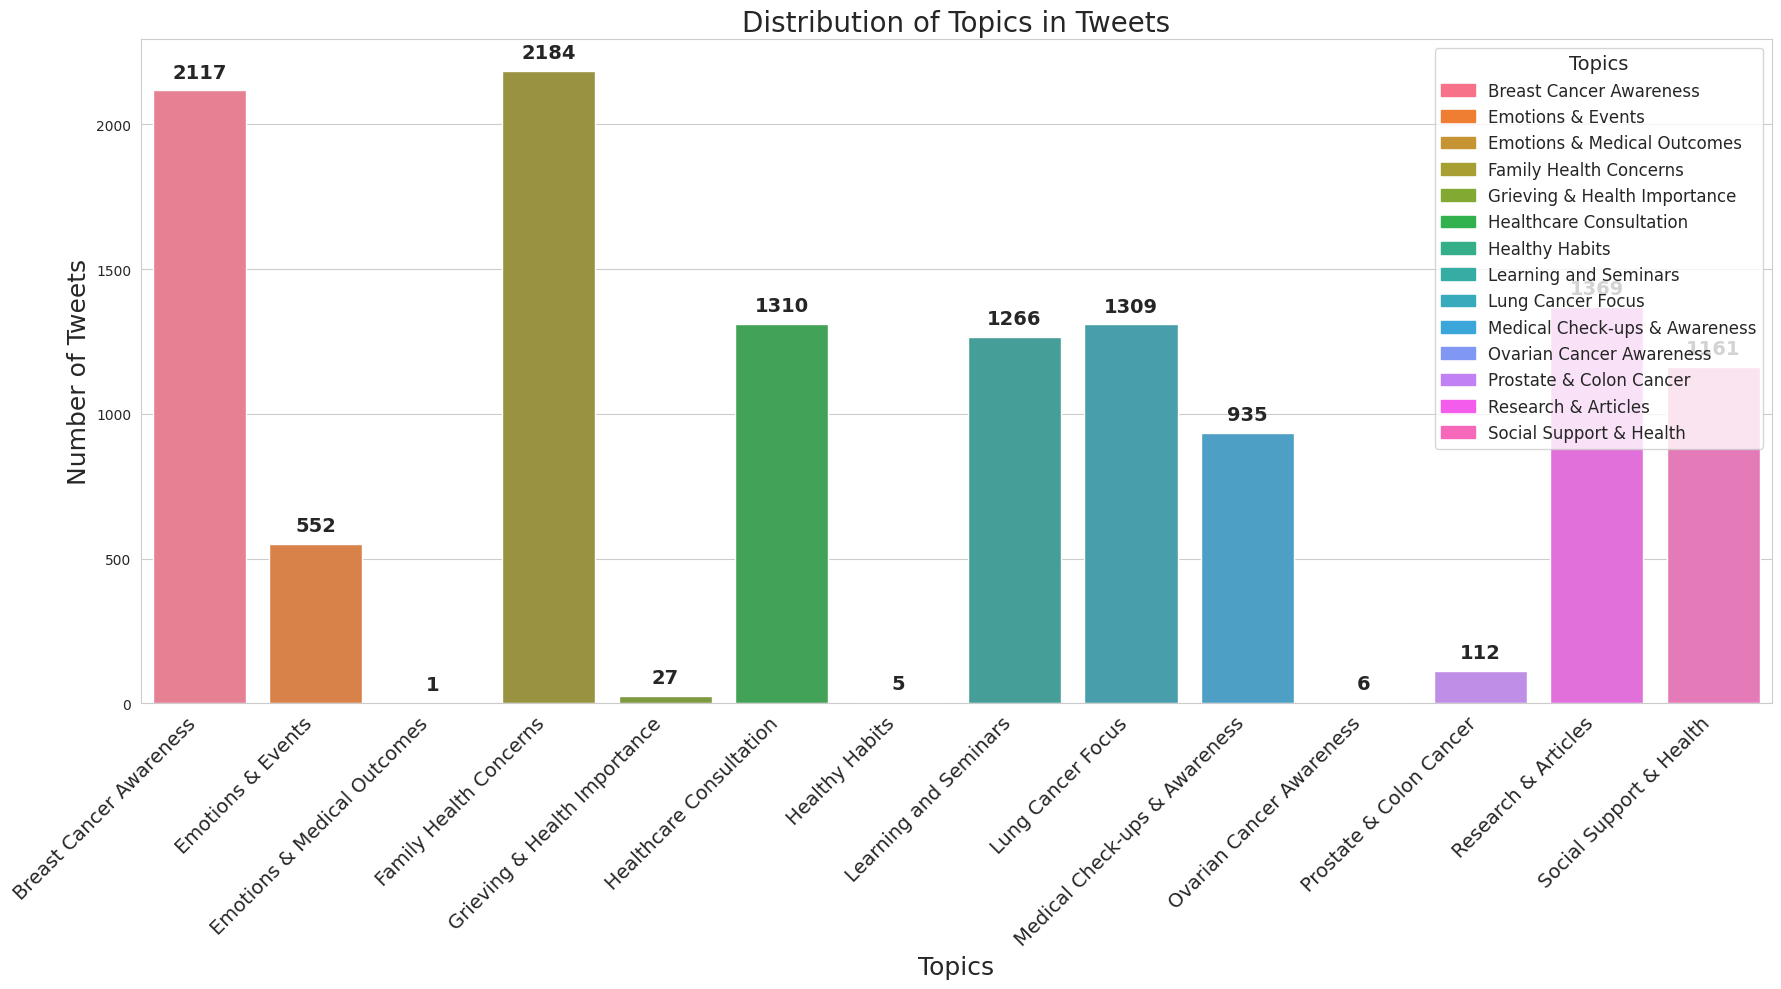

In [ ]:
import matplotlib.patches as mpatches

# Count the number of tweets for each topic label
topic_counts = relevant_tweets['Topic_Label'].value_counts().sort_index()

# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(topic_counts))

plt.figure(figsize=(18, 10))

# Use countplot
sns.countplot(data=relevant_tweets, x='Topic_Label', order=topic_counts.index, palette=palette)

# Adding decorations to the plot
plt.title('Distribution of Topics in Tweets', fontsize=20)
plt.xlabel('Topics', fontsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
plt.xticks(rotation=45, fontsize=14, ha='right')

# Display the count on top of each bar
for i, v in enumerate(topic_counts):
    plt.text(i, v + 30, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Create legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(palette, topic_counts.index)]
plt.legend(handles=legend_patches, title='Topics', loc='upper right', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
relevant_tweets['Date'] = pd.to_datetime(relevant_tweets['Date'])

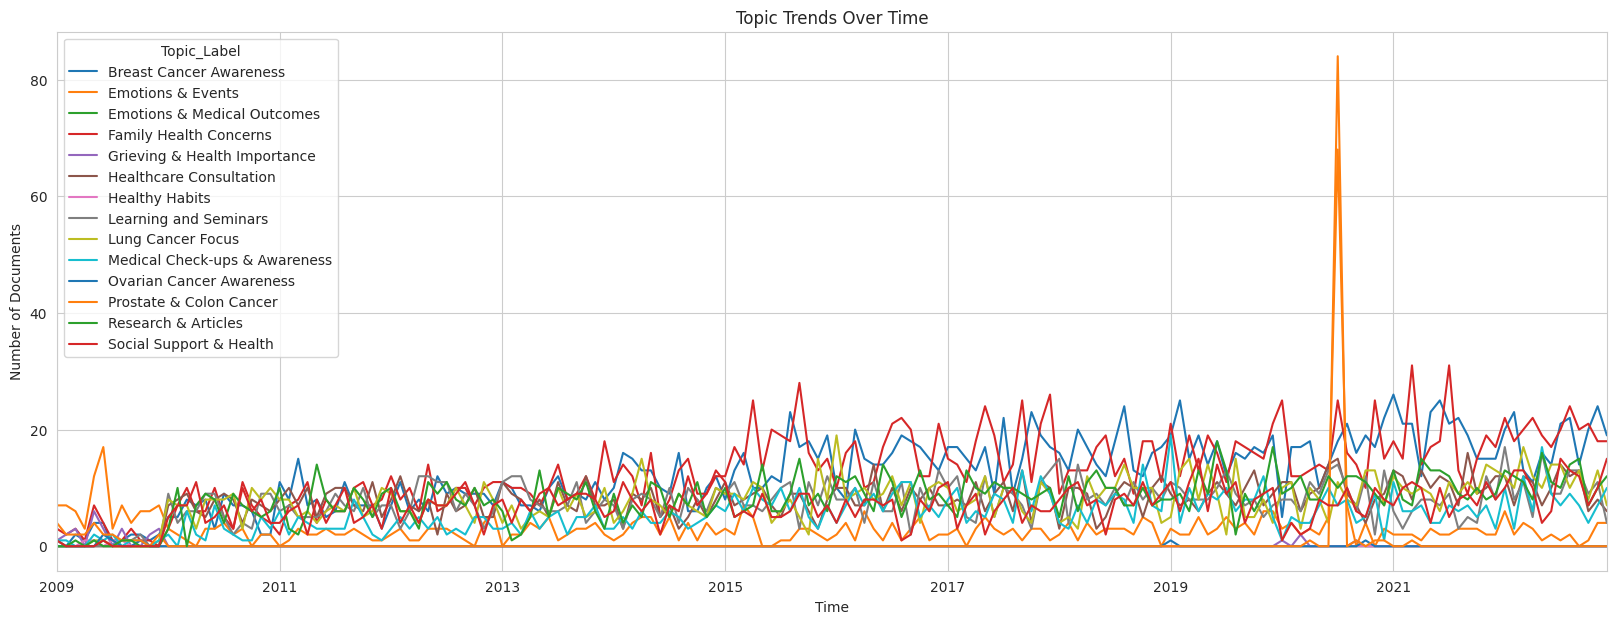

In [ ]:
# topic trends over time
import pandas as pd
import matplotlib.pyplot as plt

# Group by month (or other time period) and dominant topic
topic_counts = relevant_tweets.groupby([relevant_tweets['Date'].dt.to_period('M'), relevant_tweets['Topic_Label']]).size().unstack().fillna(0)

# Plot
topic_counts.plot(figsize=(20, 7))
plt.title('Topic Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Documents')
plt.show()
